In [1]:
#Load pickle

import pickle
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

In [2]:
with open('Prob3Data.pickle', 'rb') as f:
    data = pickle.load(f)

print(f"data: {data}")

time = data['data1']['time']
conc = data['data1']['conc']

time, conc

data: {'data1': {'time': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), 'conc': array([2.2       , 1.71291325, 1.33353908, 1.03808545, 0.80797303,
       0.62893919, 0.48961121, 0.38112818, 0.29664189, 0.23090987,
       0.17975665, 0.13992836, 0.10890994, 0.08477664, 0.06599614,
       0.05137365, 0.0399855 , 0.03112504, 0.02422992, 0.01886161,
       0.01468345])}, 'data2': {'time': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20]), 'conc': array([2.25376671, 1.89630175, 1.1076544 , 1.12430278, 0.83984956,
       0.49817036, 0.44625201, 0.41539063, 0.65448159, 0.50785358,
       0.04476796, 0.44342071, 0.18145036, 0.07847115, 0.13747043,
       0.03087704, 0.02757107, 0.1800948 , 0.16513337, 0.16058085,
       0.08183316])}}


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 array([2.2       , 1.71291325, 1.33353908, 1.03808545, 0.80797303,
        0.62893919, 0.48961121, 0.38112818, 0.29664189, 0.23090987,
        0.17975665, 0.13992836, 0.10890994, 0.08477664, 0.06599614,
        0.05137365, 0.0399855 , 0.03112504, 0.02422992, 0.01886161,
        0.01468345]))

In [3]:
time_2 = data['data2']['time']
conc_2 = data['data2']['conc']

time_2, conc_2

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 array([2.25376671, 1.89630175, 1.1076544 , 1.12430278, 0.83984956,
        0.49817036, 0.44625201, 0.41539063, 0.65448159, 0.50785358,
        0.04476796, 0.44342071, 0.18145036, 0.07847115, 0.13747043,
        0.03087704, 0.02757107, 0.1800948 , 0.16513337, 0.16058085,
        0.08183316]))

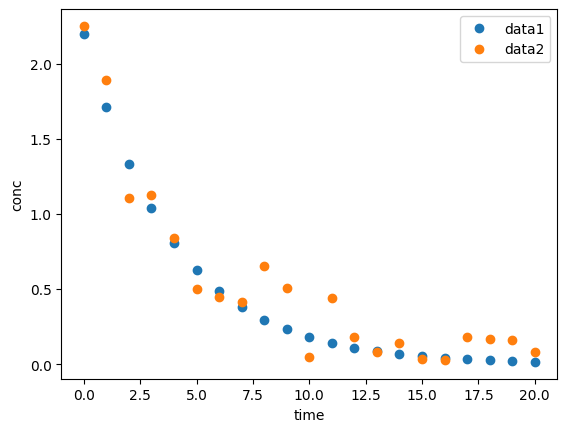

In [4]:
plt.plot(time, conc, 'o', label='data1')
plt.plot(time_2, conc_2, 'o', label='data2')
plt.xlabel('time')
plt.ylabel('conc')
plt.legend()

In [13]:
def model(t, c, k):
    dcdt = -k * c
    return dcdt

def fit_func(t, c_0, k):
    sol = solve_ivp(lambda t,c: model(t,c,k), t_span=(t[0], t[-1]), y0=[c_0], t_eval=t )
    return sol.y[0]

def fit_model(time, conc, c_0, k_guess):
    popt, pcov = curve_fit(lambda t,k : fit_func(t, c_0, k), time, conc, p0=[k_guess], )
    return popt, pcov

popt: [0.2504184]
least_square_error: 2.420244927408832
popt2: [0.18454089]
least_square_error2: 2.242896584431635


In [14]:
k = 0.1
c_01 = 2.2

popt, pcov = fit_model(time, conc, c_01, k)
print(f"popt: {popt}")

least_square_error = np.sqrt(sum((conc - fit_func(time, c_01, k))**2))

print(f"least_square_error: {least_square_error}")

c_02 = 1.8
popt2, pcov2 = fit_model(time_2, conc_2, c_02, k)

print(f"popt2: {popt2}")

least_square_error2 = np.sqrt(sum((conc_2 - fit_func(time_2, c_01, k))**2))

print(f"least_square_error2: {least_square_error2}")

popt: [0.2504184]
least_square_error: 2.420244927408832
popt2: [0.18454089]
least_square_error2: 2.242896584431635
